In [1]:
import matplotlib.pyplot as plt
from self_modelling import HopfieldNetworkRC
from pbil import PBIL

In [2]:
N = 100

relaxations = 10 * N
state_updates = relaxations
hopfield_learning_rate = 0.001 / (10 * N)

iterations = relaxations
population_size = 50
sample_frac = 0.3
pbil_learning_rate = 0.7

hopfield_params = [relaxations,state_updates,hopfield_learning_rate]
pbil_params = [iterations,population_size,sample_frac,pbil_learning_rate]

hopfield_model = HopfieldNetworkRC(N)
pbil_model = PBIL(hopfield_model.initial_weights)

In [3]:
hopfield_params, pbil_params

([1000, 1000, 1e-06], [1000, 50, 0.3, 0.7])

In [4]:
hopfield_energies_without_learning = hopfield_model.run_random_restarts(relaxations,state_updates,True,False,hopfield_learning_rate)
hopfield_energies_after_learning = hopfield_model.run_random_restarts(relaxations,state_updates,True,True,hopfield_learning_rate)

In [5]:
pbil_energies = pbil_model.run(iterations,population_size,sample_frac,pbil_learning_rate)

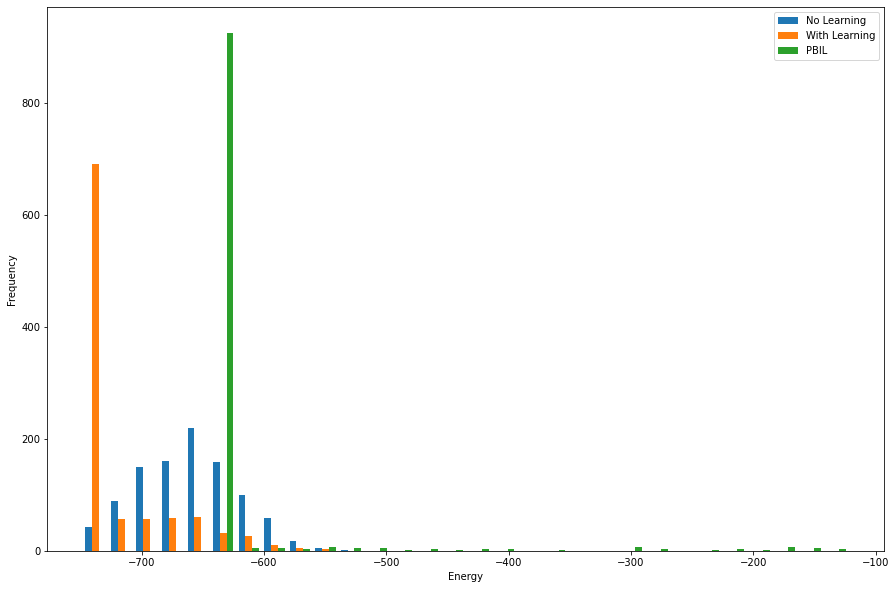

In [6]:
fig, ax = plt.subplots(figsize=[15,10])

minima_energies_without_learning = [ relaxation_energies[-1] for relaxation_energies in hopfield_energies_without_learning]
minima_energies_after_learning = [ relaxation_energies[-1] for relaxation_energies in hopfield_energies_after_learning]
minima_energies_pbil = [min(sample_energies) for sample_energies in pbil_energies]

ax.hist([minima_energies_without_learning, minima_energies_after_learning,minima_energies_pbil],label=['No Learning','With Learning','PBIL'],bins=30)
ax.set_xlabel('Energy')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()